# 다항회귀

## 다항식 특성으로 변환

In [85]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np

X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

In [87]:
#1번째 방법
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [88]:
#2번째 방법
poly.fit_transform(X)

array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [89]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

## 사이킷런으로 다항 회귀 분석

In [90]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

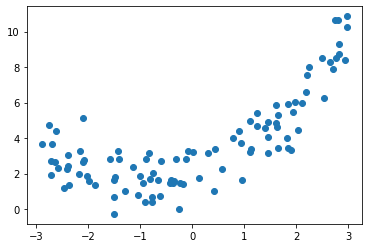

In [91]:
import numpy as np
import matplotlib.pyplot as plt

#rand(!00,1) =>0~1사이의 값으로 100개 만듬
#randn => 가우시안표준정규분포로 만듬
X = 6 * np.random.rand(100,1) -3
y = 0.5 *X ** 2 + X + 2 +np.random.randn(100,1)

plt.scatter(X,y)
plt.show()

In [92]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

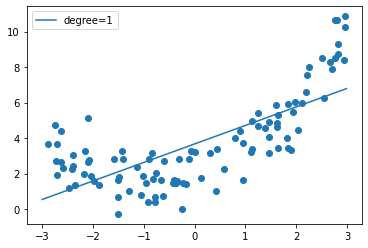

In [93]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train =y

reg1 = LinearRegression().fit(X1_train, y_train)

xx = np.arange(-3,3, 0.01)[:,np.newaxis] #.reshape(-1,1)
yy = reg1.predict(xx)
plt.plot(xx,yy, label = 'degree=1')
plt.scatter(X,y)
plt.legend() #범례
plt.show()

In [94]:
# 3) 2차항 형태로 다항 회귀 수행

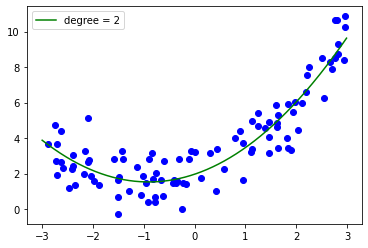

In [95]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X2_train = poly.fit_transform(X)
y_train =y

reg2 = LinearRegression().fit(X2_train, y_train)

xx = np.arange(-3,3,0.01)
yy = reg2.predict(poly.transform(xx[:, np.newaxis])) #train에서 fit한 것을 그대로 가져옴

plt.plot(xx, yy, color='g', label='degree = 2')
plt.scatter(X,y, color='b')
plt.legend()
plt.show()

In [96]:
# 구해진 2차식의 계수 확인

In [97]:
reg2.coef_, reg2.intercept_

(array([[0.        , 0.96563376, 0.53448655]]), array([1.96452927]))

In [98]:
# 4) 7차항 형태로 다항회귀 수행

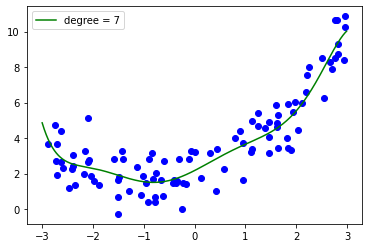

In [99]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)

X7_train = poly.fit_transform(X)
y_train =y

reg7 = LinearRegression().fit(X7_train, y_train)

xx = np.arange(-3,3,0.01)
yy = reg7.predict(poly.transform(xx[:, np.newaxis]))

plt.plot(xx, yy, color='g', label='degree = 7')
plt.scatter(X,y, color='b')
plt.legend()
plt.show()

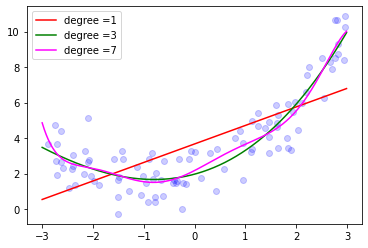

In [100]:
# 그래프 비교

degree = [1,3,7]
colors = ['red', 'green', 'magenta']

plt.scatter(X,y, color = 'b', alpha =0.2)
for i,d in enumerate(degree):
    poly = PolynomialFeatures(degree = d)
    X_train = poly.fit_transform(X)
    y_train = y
    
    reg = LinearRegression().fit(X_train, y_train)
    xx = np.arange(-3,3,0.01)
    yy = reg.predict(poly.transform(xx[:, np.newaxis]))
    
    plt.plot(xx, yy, color=colors[i], label='degree ={}'.format(d))
    plt.legend()
plt.show()

# Pipeline을 활용한 다항회귀

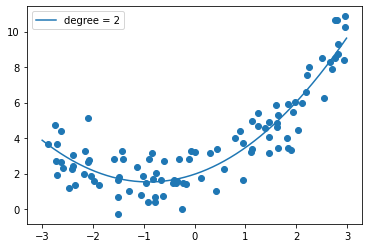

In [101]:
# 1) degree =2 model
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X,y)

xx = np.arange(-3,3,0.01)[:, np.newaxis]
yy= reg.predict(xx)

plt.plot(xx,yy, label ='degree = 2')
plt.scatter(X,y)
plt.legend()
plt.show()

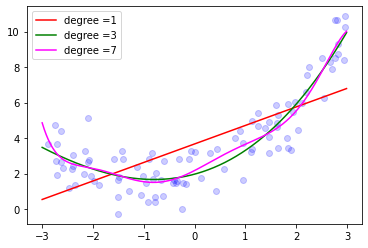

In [102]:
# 그래프 비교(pipline 활용)

degree = [1,3,7]
colors = ['red', 'green', 'magenta']

plt.scatter(X,y, color = 'b', alpha =0.2)
for i,d in enumerate(degree):    
    reg = make_pipeline(PolynomialFeatures(degree=d),LinearRegression()).fit(X,y)
    xx = np.arange(-3,3,0.01)[:, np.newaxis]
    yy = reg.predict(xx)
    
    plt.plot(xx, yy, color=colors[i], label='degree ={}'.format(d))
    plt.legend()
plt.show()

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

In [103]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

#### 데이터 수집

In [104]:
boston = load_boston()

#### 데이터 이해

In [105]:
#boston.DESCR
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [106]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### 데이터 준비

In [107]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [108]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [109]:
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


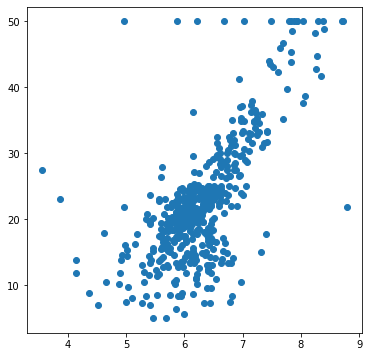

In [110]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
plt.scatter(df['RM'],df['PRICE'])
plt.show()

In [111]:
# 학습용, 검증용 데이터 분할
from sklearn.model_selection import train_test_split

X =df['RM']
y=boston.target

In [112]:
X=pd.DataFrame(X)
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 모델 구축

In [114]:
# y축 좌표계는 각 모델마다 만듦
# 방의 갯수 최대값, 최소값
X.min() , X.max()

(RM    3.561
 dtype: float64,
 RM    8.78
 dtype: float64)

In [115]:
#원본 데이터 단순 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


reg1 = lr.fit(X_train, y_train)
y_pred = reg1.predict(X_test)

print(reg1.coef_, reg1.intercept_)

[8.46109164] -30.571032410898336


In [116]:
# 시각화를 위한 xx 좌표계 미리 준비
xx = np.arange(3,9,0.01)
yy=reg1.predict(xx.reshape(-1,1))

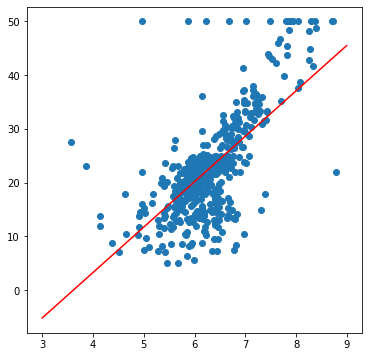

In [117]:
#선형회귀 시각화
plt.figure(figsize=(6,6))
plt.scatter(X,y)
plt.plot(xx,yy, color='red')
plt.show()

In [118]:
# 2차식의 다항회귀
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X2_train = poly.fit_transform(X_train)
X2_test = poly.transform(X_test)

reg2 = lr.fit(X2_train, y_train)
y_pred2 = reg2.predict(X2_test)

print(reg2.coef_, reg2.intercept_)

[  0.         -23.79086549   2.54284549] 70.4588073471656


In [119]:
xx2 = np.arange(3,9,0.01)
yy2 = reg2.predict(poly.transform(xx2.reshape(-1,1)))

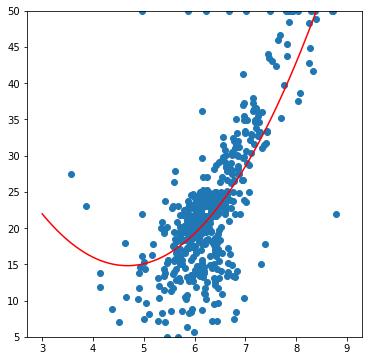

In [120]:
# 시각화
plt.figure(figsize=(6,6))
plt.scatter(X,y)
plt.plot(xx2,yy2, color='red')
plt.ylim(y.min(),y.max())
plt.show()

In [121]:
# 3차식의 다항회귀

poly = PolynomialFeatures(degree=3)

X3_train = poly.fit_transform(X_train)
X3_test = poly.transform(X_test)

reg3 = lr.fit(X3_train, y_train)
y_pred3 = reg3.predict(X3_test)

print(reg3.coef_, reg3.intercept_)

[   0.         -121.27686495   18.59069233   -0.86283235] 263.6623044802131


In [122]:
xx3 = np.arange(3,9,0.01)
yy3 = reg3.predict(poly.transform(xx3.reshape(-1,1)))

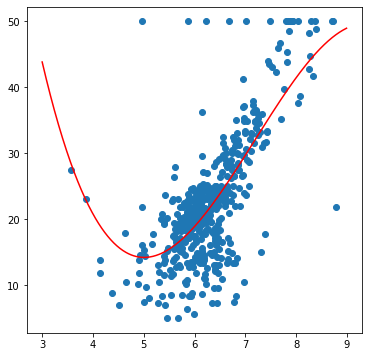

In [123]:
# 시각화
plt.figure(figsize=(6,6))
plt.scatter(X,y)
plt.plot(xx3,yy3,color='red')
plt.show()

####  다항 회귀 시각화

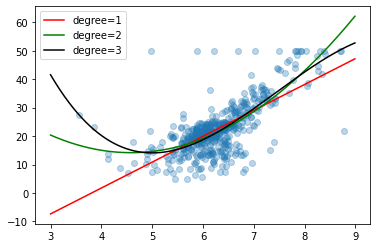

In [124]:
degree =[1,2,3]
colors=['red','green','black']

plt.scatter(X,y,alpha=0.3)
for i,d in enumerate(degree):
    poly=PolynomialFeatures(degree=d)
    X_train=poly.fit_transform(X)
    y_train = y
    
    reg = LinearRegression().fit(X_train, y_train)
    xx = np.arange(3,9,0.01)
    yy = reg.predict(poly.transform(xx.reshape(-1,1)))
    
    plt.plot(xx,yy,color=colors[i], label='degree={}'.format(d))
    plt.legend()
plt.show()

#### 모델 성능 평가

In [125]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
from sklearn.metrics import r2_score

data = { 1 : r2_score(y_test, y_pred),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
print(pd.Series(data))


1    0.601577
2    0.667063
3    0.666776
dtype: float64
